In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gmaps
import gmaps.datasets

import requests
import json
import time

from scipy import stats


from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
# sns.set(style="white")
# sns.set(style="whitegrid", color_codes=True)

c:\python36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
df1 = pd.DataFrame.from_csv("./Datasets/data_0_300.csv", sep = ",")
df2 = pd.DataFrame.from_csv("./Datasets/data_301_600.csv", sep = ",")
df3 = pd.DataFrame.from_csv("./Datasets/data_601_1200.csv", sep = ",")

nuevo_dataset = pd.concat([df1, df2, df3])
nuevo_dataset = nuevo_dataset.reset_index()
nuevo_dataset
nuevo_dataset.to_csv("prueba.csv", sep=",", index=False)

In [3]:
nuevo_dataset.corr()

,latitude,longitude,brightness,scan,track,acq_time,confidence,bright_t31,frp,incendio,temperatura,humedad,pr_atm,temp_min,temp_max
latitude,1.000000,0.425487,0.071913,0.007485,0.010714,0.377317,-0.099632,0.191522,0.011305,-0.054990,0.496933,-0.185468,0.199835,0.497506,0.496320
longitude,0.425487,1.000000,0.098946,-0.001046,-0.000448,0.160993,-0.034597,0.274885,0.035347,-0.021530,0.203467,-0.172449,0.220427,0.204283,0.202612
brightness,0.071913,0.098946,1.000000,-0.171096,-0.173658,0.337497,0.505418,0.489296,0.772872,0.417085,-0.030010,0.034902,-0.056698,-0.028620,-0.031421
scan,0.007485,-0.001046,-0.171096,1.000000,0.983328,-0.038500,-0.095479,-0.340727,0.174523,-0.061516,0.198313,-0.158555,0.057811,0.197415,0.199153
track,0.010714,-0.000448,-0.173658,0.983328,1.000000,-0.045924,-0.085265,-0.345679,0.161947,-0.053519,0.228888,-0.192684,0.072770,0.227851,0.229872
acq_time,0.377317,0.160993,0.337497,-0.038500,-0.045924,1.000000,-0.163458,0.462466,0.073066,-0.073912,-0.005139,0.000167,-0.040373,-0.004191,-0.006066
confidence,-0.099632,-0.034597,0.505418,-0.095479,-0.085265,-0.163458,1.000000,0.156833,0.322586,0.808756,-0.006001,0.019545,-0.015131,-0.004340,-0.007730
bright_t31,0.191522,0.274885,0.489296,-0.340727,-0.345679,0.462466,0.156833,1.000000,0.136429,0.126574,-0.036632,-0.062353,-0.067795,-0.035496,-0.037783
frp,0.011305,0.035347,0.772872,0.174523,0.161947,0.073066,0.322586,0.136429,1.000000,0.256096,0.051314,-0.043927,0.016008,0.051774,0.050818
incendio,-0.054990,-0.021530,0.417085,-0.061516,-0.053519,-0.073912,0.808756,0.126574,0.256096,1.000000,0.001129,0.019480,0.004398,0.002822,-0.000601


Variable brightness vs Confidence.
Coeficiente de Pearson: (0.5054181893575237, 7.2272536791099479e-79)
Coeficiente de Determinación: 0.2554475461334377


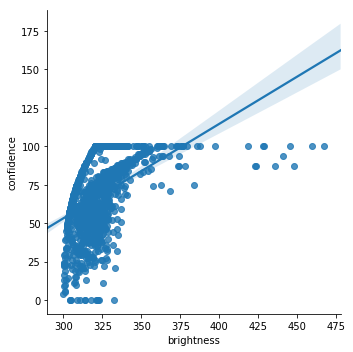

Variable temperatura vs Confidence.
Coeficiente de Pearson: (-0.0060006323558641911, 0.8354320432133866)
Coeficiente de Determinación: 3.600758867024423e-05


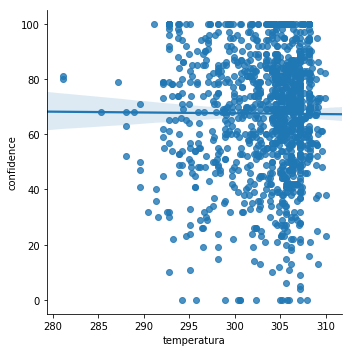

Variable humedad vs Confidence.
Coeficiente de Pearson: (0.019545077426333109, 0.49859459347816837)
Coeficiente de Determinación: 0.00038201005160135606


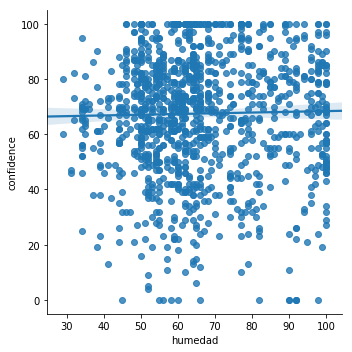

Variable pr_atm vs Confidence.
Coeficiente de Pearson: (-0.015130909543088981, 0.60038120717922205)
Coeficiente de Determinación: 0.00022894442360114122


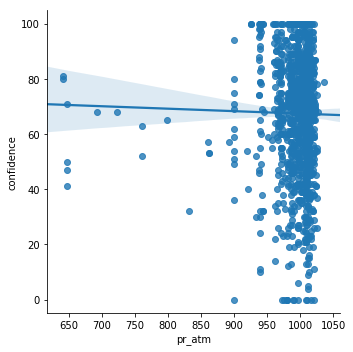

Variable temp_min vs Confidence.
Coeficiente de Pearson: (-0.0043396098785701805, 0.88057903564682938)
Coeficiente de Determinación: 1.8832213898183896e-05


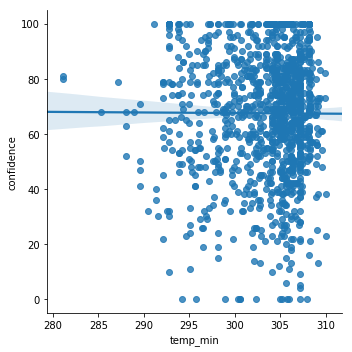

Variable temp_max vs Confidence.
Coeficiente de Pearson: (-0.0077295100970796579, 0.78901131728826546)
Coeficiente de Determinación: 5.974532634085638e-05


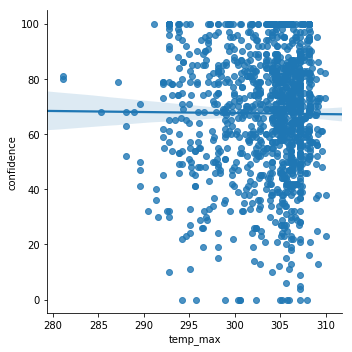

Variable incendio vs Confidence.
Coeficiente de Pearson: (0.80875610916785912, 1.162777392556867e-278)
Coeficiente de Determinación: 0.6540864441163341


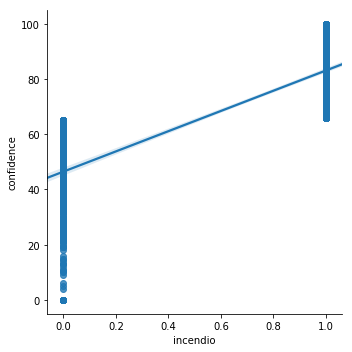

In [4]:
for variable in ["brightness", "temperatura", "humedad", "pr_atm", "temp_min", "temp_max", "incendio"]:
    r = stats.pearsonr(nuevo_dataset[variable], nuevo_dataset['confidence'])
    r_2 = r[0] ** 2
    
    print("Variable {} vs Confidence.".format(variable))
    print("Coeficiente de Pearson: {}".format(r))
    print("Coeficiente de Determinación: {}".format(r_2))
    sns.lmplot(x=variable,y='confidence',data=nuevo_dataset,fit_reg=True, order=1)
    
    #logistic=True, n_boot=500, y_jitter=.03
    plt.show()